LÊ THANH PHƯƠNG NAM_ITITWE19025

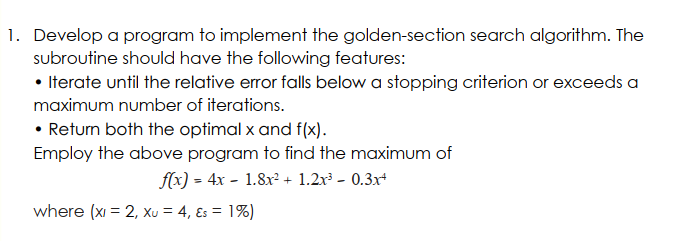

In [155]:
#Excercise 1:
#import lib

import math as m
import numpy as np
import matplotlib.pyplot as plt
import timeit
from matplotlib.pyplot import figure
%matplotlib inline

def f(x): #define the function
  return 4*x - 1.8 * (x**2) + 1.2 * (x**3) - 0.3 * (x**4)

l1 = []
l2 = []
l3 = []
l4 = []

In [156]:
def golden_section(f, xL, xU, e_s, max_iter): #define the GOlden section
  print("%-2s%-8s%-8s%-8s%-8s%-8s%-8s%-8s%-8s%-8s%-8s%-9s" % ("i","xL","f(xL)","x2","f(x2)","x1","f(x1)","xU","f(xU)","d","Opt","Error"))
  R=(m.sqrt(5)-1)/2
  xOpt=0
  for iter in range (0,max_iter):
    d=R*(xU-xL)
    x1=xL+d
    x2=xU-d

    if f(x2)>f(x1):
      xOpt=x2
      xU=x1

    if f(x2)<f(x1):
      xOpt=x1
      xL=x2

    err=(1-R)*abs((xU-xL)/xOpt)*100
    print("%-2d%-8.5f%-8.5f%-8.5f%-8.5f%-8.5f%-8.5f%-8.5f%-8.5f%-8.5f%-8.5f%-9.5f" % (iter,xL,f(xL),x2,f(x2),x1,f(x1),xU,f(xU),d,xOpt,err))
    l1.append(xL)
    l2.append(f(xL))
    l3.append(xOpt)
    l4.append(f(xOpt))
    if err < 1:
      return xOpt , f(xOpt)

In [157]:
print("LÊ THANH PHƯƠNG NAM_ITITWE19025_eX1:\n ")
#solve function & calculate the time to run
starttime = timeit.default_timer()
print(" Optimal point and value are: \n" + str(golden_section(f,2, 4, 1, 1000)))
print("The runtime is : ", timeit.default_timer() - starttime, 'second.')

LÊ THANH PHƯƠNG NAM_ITITWE19025_eX1:
 
i xL      f(xL)   x2      f(x2)   x1      f(x1)   xU      f(xU)   d       Opt     Error    
0 2.00000 5.60000 2.76393 5.13466 3.23607 1.86099 3.23607 1.86099 1.23607 2.76393 17.08204 
1 2.00000 5.60000 2.47214 5.81297 2.76393 5.13466 2.76393 5.13466 0.76393 2.47214 11.80340 
2 2.00000 5.60000 2.29180 5.88162 2.47214 5.81297 2.47214 5.81297 0.47214 2.29180 7.86893  
3 2.18034 5.82265 2.18034 5.82265 2.29180 5.88162 2.47214 5.81297 0.29180 2.29180 4.86327  
4 2.18034 5.82265 2.29180 5.88162 2.36068 5.88154 2.36068 5.88154 0.18034 2.29180 3.00566  
5 2.24922 5.86722 2.24922 5.86722 2.29180 5.88162 2.36068 5.88154 0.11146 2.29180 1.85760  
6 2.29180 5.88162 2.29180 5.88162 2.31811 5.88513 2.36068 5.88154 0.06888 2.31811 1.13503  
7 2.31811 5.88513 2.31811 5.88513 2.33437 5.88514 2.36068 5.88154 0.04257 2.33437 0.69660  
 Optimal point and value are: 
(2.3343685400050473, 5.885135744935289)
The runtime is :  0.0061185220001789276 second.


<Figure size 400x400 with 0 Axes>

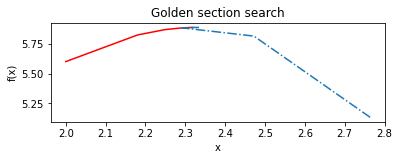

In [158]:
figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
plt.figure()
plt.subplot(2, 1, 2)
plt.plot(l1, l2, 'r-')
plt.plot(l3, l4, '-.')
plt.title("Golden section search")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


The runtime of Newton is : 0.0013648439999087714 second
The runtime of GOlden section is :  0.00436340700071014 second.
it means it's lower

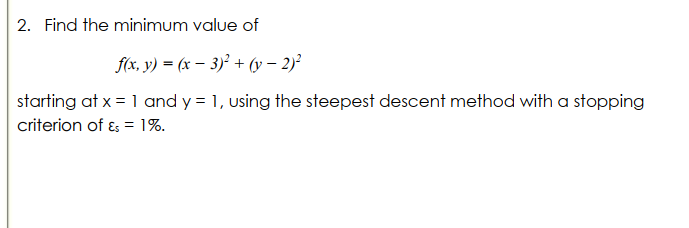

In [133]:
#Excercise 2:
import sympy as sp #import lib

X, Y=sp.symbols('X,Y',real = True)
f = (X-3)**2+(Y-2)**2 #define the function

In [134]:
def steepest_descent(function, x_i, y_i, Es, maxiter): #define the steepest descent
  global x_res, y_res
  i = 0
  err_x = 100
  err_y = 100

  x0, y0 = x_i, y_i

  H=sp.Symbol('H', real = True)
  dfdx= sp.diff(f,X)
  dfdy= sp.diff(f,Y)

  print ("%10s %10s %10s %10s %10s" % ("Iteration", "x", "y", "errX", "errY"))

  while i<maxiter and (abs(err_x)>Es or abs(err_y)>Es):
    i=i+1

    x=x0+dfdx.subs([(X,x0),(Y,y0)])*H
    y=y0+dfdy.subs([(X,x0),(Y,y0)])*H

    g=f.subs([(X,x),(Y,y)])
    dg=sp.diff(g,H)

    if sp.solve(dg,H):
      h=sp.solve(dg,H)[0]

      x_res=x.subs(H,h)
      y_res=y.subs(H,h)

      err_x=((x-x_res)/x)*100
      err_y=((y-y_res)/y)*100

      x0,y0=x_res,y_res
      print("%10d %10f %10f %10f %10f" % (i, x_res, y_res, err_x, err_y))
    return f.subs([(X,x_res), (Y,y_res)])


In [135]:
print("LÊ THANH PHƯƠNG NAM_ITITWE19025_eX2:\n ")
#solve function & calculate the time to run
starttime = timeit.default_timer()
print("Optimal value of f(x) is")
res = steepest_descent(f , 1, 1, 1, 100)
print(res)
print("The runtime is : ", timeit.default_timer() - starttime, 'second.')

LÊ THANH PHƯƠNG NAM_ITITWE19025_eX2:
 
Optimal value of f(x) is
 Iteration          x          y       errX       errY


TypeError: ignored

The runtime of random is : 0.008593683000071906 second